In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def definir_tipo(x):
    tipos_apartamento = ['Apartamento', 'Departamento Compartido']
    if x in ['Casa en condominio', 'Casa', 'Casa uso de suelo', 'Quinta Vacacional']:
        return 'Casa'
    elif x in ['Apartamento', 'Departamento Compartido']:
        return 'Apartamento'
    return x

types = {'id': int, 'titulo': str, 'descripcion': str, 'tipodepropiedad': str, 'direccion': str,
        'ciudad': str, 'provincia': str, 'antiguedad': np.float32, 'habitaciones': np.float32,
        'garages':np.float32, 'idzona': np.float32, 'lat': np.float32, 'lng': np.float32,
        'gimnasio': int, 'usosmultiples': int, 'piscina': int, 'escuelascercanas': int,
        'centroscomercialescercanos': int, 'precio':int}
pd.set_option('display.max_columns', 30)
data = pd.read_csv('../../data/train.csv', dtype = types)

data.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,2.0,80.0,80.0,23533.0,NaN,NaN,2015-08-23 00:00:00,0,0,0,0,0,2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,2.0,268.0,180.0,24514.0,19.310204,-99.227654,2013-06-28 00:00:00,0,0,0,1,1,3600000
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,2.0,144.0,166.0,48551.0,NaN,NaN,2015-10-17 00:00:00,0,0,0,0,0,1200000
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,1.0,63.0,67.0,53666.0,19.301889,-99.688019,2012-03-09 00:00:00,0,0,0,1,1,650000
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,1.0,95.0,95.0,47835.0,NaN,NaN,2016-06-07 00:00:00,0,0,0,0,0,1150000


In [2]:
data['algun_amenity'] = (data['gimnasio'] + data['usosmultiples'] + data['piscina'] + data['escuelascercanas'] + data['centroscomercialescercanos']) > 0
data['todos_los_amenities'] = (data['gimnasio'] * data['usosmultiples'] * data['piscina'] * data['escuelascercanas'] * data['centroscomercialescercanos']) > 0

algun_amenity = data.algun_amenity.value_counts(normalize = True)
todos_los_amenities = data.todos_los_amenities.value_counts(normalize = True)

Text(0, 0.5, 'Porcentaje sobre propiedades totales')

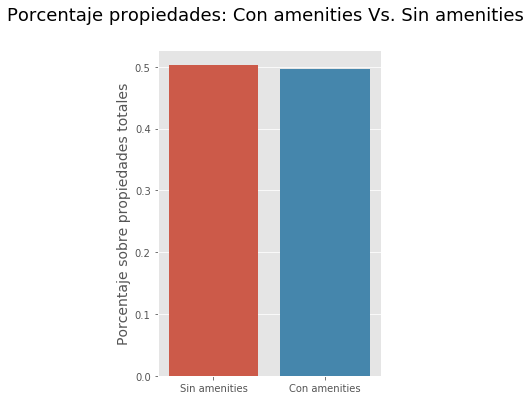

In [3]:
plt.figure(figsize=(4, 6))
ax = sns.barplot(x = ['Sin amenities', 'Con amenities'], y = algun_amenity)
plt.suptitle('Porcentaje propiedades: Con amenities Vs. Sin amenities', fontsize=18)
plt.ylabel("Porcentaje sobre propiedades totales", fontsize = 14)

In [4]:
data['count'] = 1
algun_amenity = data.groupby(['tipodepropiedad', 'algun_amenity']).agg({'count':'sum'})
algun_amenity.reset_index(inplace = True)
algun_amenity['count'] = np.log(algun_amenity['count'])
algun_amenity.head()

,tipodepropiedad,algun_amenity,count
0,Apartamento,False,10.177438
1,Apartamento,True,10.342968
2,Bodega comercial,False,7.035269
3,Bodega comercial,True,5.598422
4,Casa,False,11.177802


Text(0.5, 1.0, 'Numero de propiedades con algun amenity por tipo')

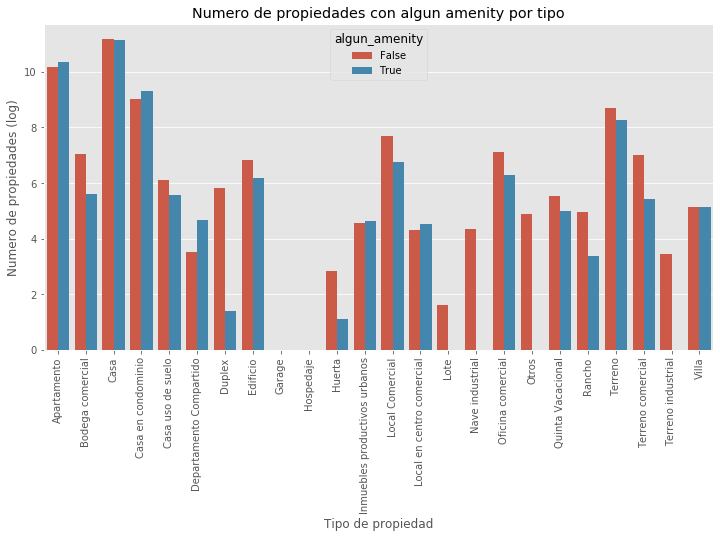

In [5]:
plt.figure(figsize=(12, 6))
sns.barplot(x='tipodepropiedad', y='count', hue='algun_amenity', data=algun_amenity)
plt.xticks(rotation=90)
plt.ylabel('Numero de propiedades (log)')
plt.xlabel('Tipo de propiedad')
plt.title('Numero de propiedades con algun amenity por tipo')

In [6]:
algun_amenity = data.groupby('algun_amenity').agg({'precio' : 'mean'})
algun_amenity.reset_index(inplace = True)
algun_amenity['precio'] = algun_amenity['precio']/1000
algun_amenity

,algun_amenity,precio
0,False,2463.854545
1,True,2598.554014


Text(0, 0.5, 'Precio propiedad promedio')

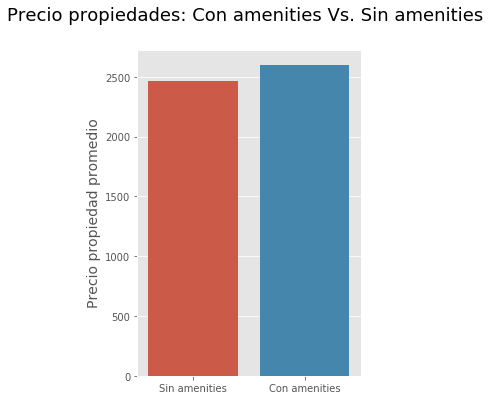

In [7]:
plt.figure(figsize=(4, 6))
ax = sns.barplot(x = ['Sin amenities', 'Con amenities'], y = algun_amenity['precio'])
plt.suptitle('Precio propiedades: Con amenities Vs. Sin amenities', fontsize=18)
plt.ylabel("Precio propiedad promedio", fontsize = 14)

In [8]:
algun_amenity = data
algun_amenity['tipodepropiedad'] = algun_amenity['tipodepropiedad'].apply(definir_tipo)
algun_amenity = algun_amenity.groupby(['tipodepropiedad', 'algun_amenity']).agg({'precio':'mean'})
algun_amenity.reset_index(inplace = True)
algun_amenity['precio'] = algun_amenity['precio']/1000

Text(0.5, 1.0, 'Precio de propiedad segun amenities')

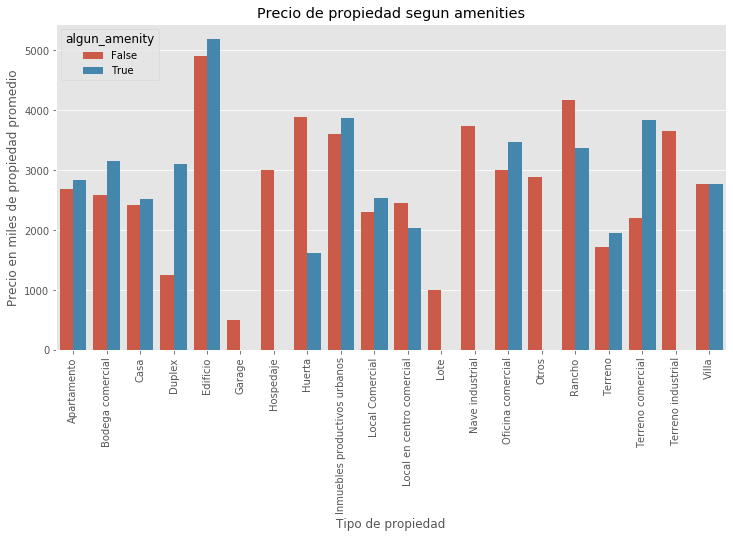

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x='tipodepropiedad', y='precio', hue='algun_amenity', data=algun_amenity)
plt.xticks(rotation=90)
plt.ylabel('Precio en miles de propiedad promedio')
plt.xlabel('Tipo de propiedad')
plt.title('Precio de propiedad segun amenities')

Text(0, 0.5, 'Porcentaje sobre propiedades totales')

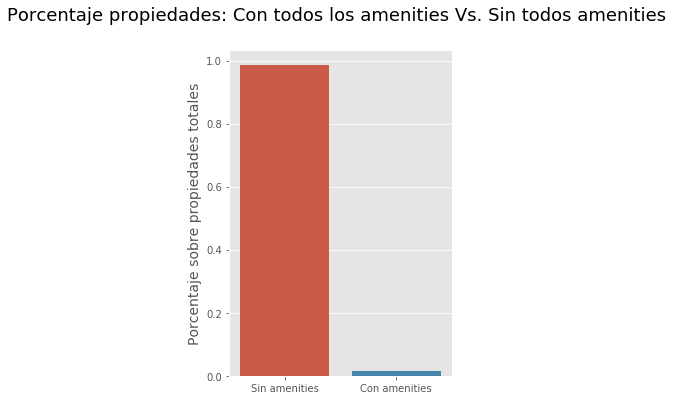

In [10]:
plt.figure(figsize=(4, 6))
ax = sns.barplot(x = ['Sin amenities', 'Con amenities'], y = todos_los_amenities)
plt.suptitle('Porcentaje propiedades: Con todos los amenities Vs. Sin todos amenities', fontsize=18)
plt.ylabel("Porcentaje sobre propiedades totales", fontsize = 14)

In [40]:
todos_los_amenities = data
todos_los_amenities['tipodepropiedad'] = todos_los_amenities['tipodepropiedad'].apply(definir_tipo)
todos_los_amenities = todos_los_amenities.loc[todos_los_amenities.tipodepropiedad.isin(['Apartamento','Casa'])]
todos_los_amenities = todos_los_amenities.groupby(['tipodepropiedad', 'todos_los_amenities']).agg({'precio':'mean'})
todos_los_amenities.reset_index(inplace = True)
todos_los_amenities['precio'] = todos_los_amenities['precio']/1000

Text(0.5, 1.0, 'Precio de propiedades con todos los tipos de amenity')

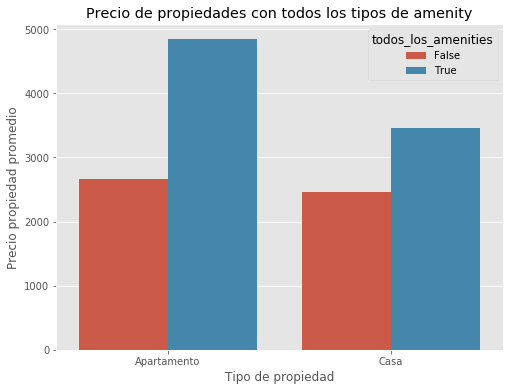

In [41]:
plt.figure(figsize=(8, 6))
sns.barplot(x='tipodepropiedad', y='precio', hue='todos_los_amenities', data=todos_los_amenities)
plt.ylabel('Precio propiedad promedio')
plt.xlabel('Tipo de propiedad')
plt.title('Precio de propiedades con todos los tipos de amenity')

In [13]:
propiedades_gimnasio = pd.DataFrame()
propiedades_gimnasio['gimnasio'] = data['gimnasio'].apply(lambda x: False if x=='NaN' else x)
propiedades_gimnasio['precio_en_miles'] = data['precio']/1000
gimnasios_normalized = propiedades_gimnasio.gimnasio.value_counts(normalize = True)

Text(0, 0.5, 'Porcentaje sobre propiedades totales')

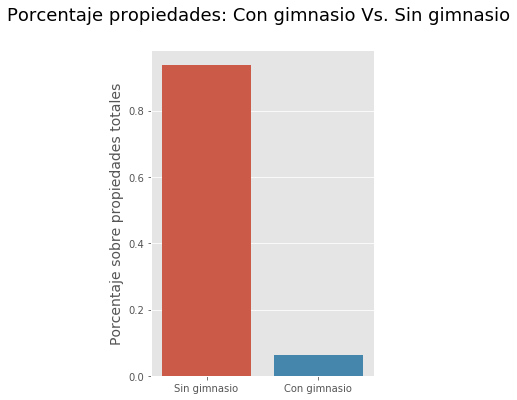

In [14]:
plt.figure(figsize=(4, 6))
ax = sns.barplot(x = ['Sin gimnasio', 'Con gimnasio'], y = gimnasios_normalized)
plt.suptitle('Porcentaje propiedades: Con gimnasio Vs. Sin gimnasio', fontsize=18)
plt.ylabel("Porcentaje sobre propiedades totales", fontsize = 14)

In [15]:
propiedades_gimnasio_tipo = pd.DataFrame()
propiedades_gimnasio_tipo['gimnasio'] = data['gimnasio'].apply(lambda x: False if x=='NaN' else x)
propiedades_gimnasio_tipo['precio_en_miles'] = data['precio']/1000
propiedades_gimnasio_tipo['tipodepropiedad'] = data['tipodepropiedad']
    
propiedades_gimnasio_tipo['tipodepropiedad'].apply(definir_tipo)
propiedades_gimnasio_def = propiedades_gimnasio_tipo.loc[propiedades_gimnasio_tipo.tipodepropiedad.isin(['Casa', 'Apartamento'])]
propiedades_gimnasio_def['count'] = 1

propiedades_gimnasio_def.head()

/home/pablo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gimnasio,precio_en_miles,tipodepropiedad,count
0,0,2273.0,Apartamento,1
1,0,3600.0,Casa,1
2,0,1200.0,Casa,1
3,0,650.0,Casa,1
4,0,1150.0,Apartamento,1


In [16]:
gimnasios = propiedades_gimnasio_def.groupby(['tipodepropiedad', 'gimnasio']).agg({'count':'sum'})
gimnasios.reset_index(inplace = True)
gimnasios['gimnasio'] = gimnasios['gimnasio'].apply(lambda x: 'Con gimnasio' if x == True else 'Sin gimnasio')
gimnasios.head()

,tipodepropiedad,gimnasio,count
0,Apartamento,Sin gimnasio,49857
1,Apartamento,Con gimnasio,7625
2,Casa,Sin gimnasio,154750
3,Casa,Con gimnasio,7367


/home/pablo/.local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 23.80000000000001, 'Tipo de propiedad')

<Figure size 1152x432 with 0 Axes>

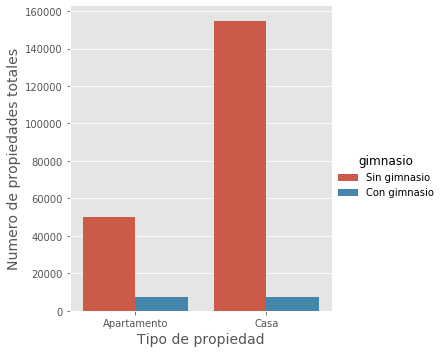

In [17]:
plt.figure(figsize=(16, 6))
plt.suptitle('Casas y apartamentos: Con gimnasio Vs. Sin gimnasio', fontsize=18)
sns.factorplot(x='tipodepropiedad', y='count', hue='gimnasio', data=gimnasios, kind='bar')
plt.ylabel("Numero de propiedades totales", fontsize = 14)
plt.xlabel("Tipo de propiedad", fontsize = 14)

/home/pablo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 23.80000000000001, 'Tipo de propiedad')

<Figure size 1152x432 with 0 Axes>

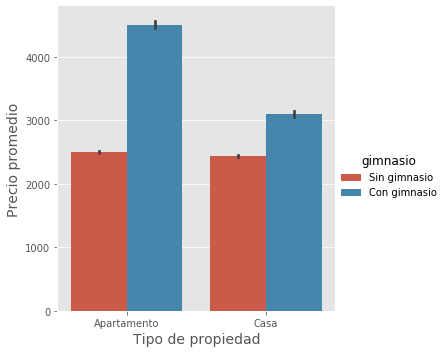

In [18]:
propiedades_gimnasio_def['gimnasio'] = propiedades_gimnasio_def['gimnasio'].apply(lambda x: 'Con gimnasio' if x == True else 'Sin gimnasio')
plt.figure(figsize=(16, 6))
plt.suptitle('Casas y apartamentos: Con gimnasio Vs. Sin gimnasio', fontsize=18)
sns.factorplot(x='tipodepropiedad', y='precio_en_miles', hue='gimnasio', data=propiedades_gimnasio_def, kind='bar')
plt.ylabel("Precio promedio", fontsize = 14)
plt.xlabel("Tipo de propiedad", fontsize = 14)

Text(0, 0.5, 'Precio propiedad promedio')

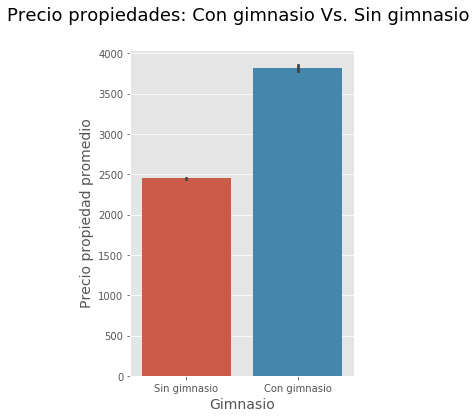

In [19]:
plt.figure(figsize=(4, 6))
ax = sns.barplot(x = propiedades_gimnasio_def.gimnasio, y = propiedades_gimnasio_def.precio_en_miles)
plt.suptitle('Precio propiedades: Con gimnasio Vs. Sin gimnasio', fontsize=18)
plt.xlabel("Gimnasio", fontsize = 14)
plt.ylabel("Precio propiedad promedio", fontsize = 14)

In [20]:
propiedades_piscina = pd.DataFrame()
propiedades_piscina['piscina'] = data['piscina'].apply(lambda x: False if x=='NaN' else x)
propiedades_piscina['tipodepropiedad'] = data['tipodepropiedad'].apply(definir_tipo)
propiedades_piscina['precio_en_miles'] = data['precio']/1000
propiedades_piscina['count'] = 1
piscinas_normalized = propiedades_piscina.piscina.value_counts(normalize = True)

Text(0, 0.5, 'Porcentaje sobre propiedades totales')

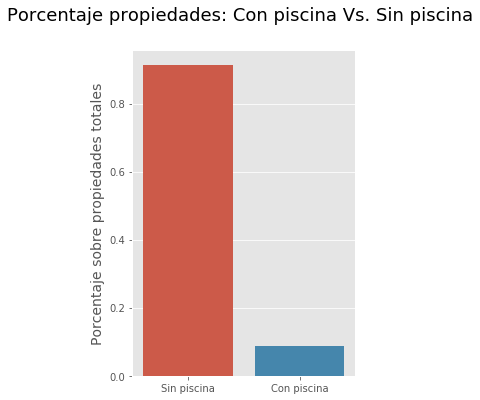

In [21]:
plt.figure(figsize=(4, 6))
ax = sns.barplot(x = ['Sin piscina', 'Con piscina'], y = piscinas_normalized)
plt.suptitle('Porcentaje propiedades: Con piscina Vs. Sin piscina', fontsize=18)
plt.ylabel("Porcentaje sobre propiedades totales", fontsize = 14)

Text(0, 0.5, 'Precio propiedad promedio')

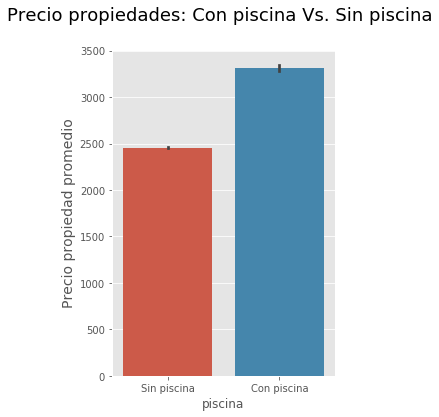

In [22]:
plt.figure(figsize=(4, 6))
ax = sns.barplot(x = propiedades_piscina.piscina, y = propiedades_piscina.precio_en_miles)
plt.suptitle('Precio propiedades: Con piscina Vs. Sin piscina', fontsize=18)
ax.set_xticklabels(['Sin piscina', 'Con piscina'])
plt.ylabel("Precio propiedad promedio", fontsize = 14)

Text(0.5, 23.80000000000001, 'Tipo de propiedad')

<Figure size 1152x432 with 0 Axes>

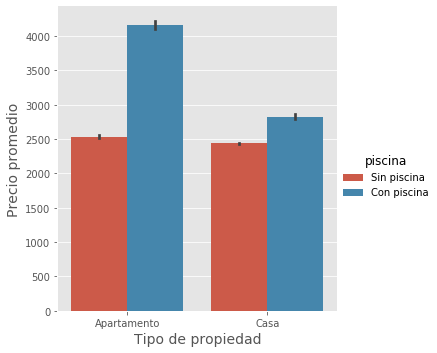

In [23]:
propiedades_piscina = propiedades_piscina.loc[propiedades_piscina.tipodepropiedad.isin(['Casa', 'Apartamento'])]

propiedades_piscina['piscina'] = propiedades_piscina['piscina'].apply(lambda x: 'Con piscina' if x == True else 'Sin piscina')
plt.figure(figsize=(16, 6))
plt.suptitle('Casas y apartamentos: Con piscina Vs. Sin piscina', fontsize=18)
sns.factorplot(x='tipodepropiedad', y='precio_en_miles', hue='piscina', data=propiedades_piscina, kind='bar')
plt.ylabel("Precio promedio", fontsize = 14)
plt.xlabel("Tipo de propiedad", fontsize = 14)

In [24]:
propiedades_piscina_count = propiedades_piscina.groupby(['tipodepropiedad', 'piscina']).agg({'count':'sum'})
propiedades_piscina_count.reset_index(inplace = True)

Text(0.5, 23.80000000000001, 'Tipo de propiedad')

<Figure size 1152x432 with 0 Axes>

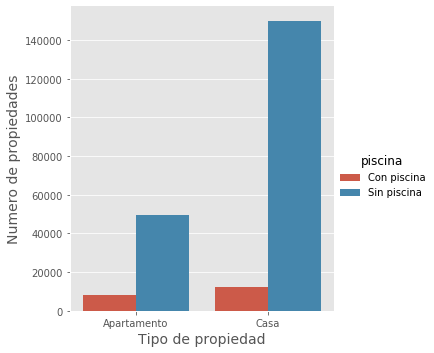

In [25]:
plt.figure(figsize=(16, 6))
plt.suptitle('Casas y apartamentos: Con piscina Vs. Sin piscina', fontsize=18)
sns.factorplot(x='tipodepropiedad', y='count', hue='piscina', data=propiedades_piscina_count, kind='bar')
plt.ylabel("Numero de propiedades", fontsize = 14)
plt.xlabel("Tipo de propiedad", fontsize = 14)

In [26]:
propiedades_usosmultiples = pd.DataFrame()
propiedades_usosmultiples['usosmultiples'] = data['usosmultiples'].apply(lambda x: False if x=='NaN' else x)
propiedades_usosmultiples['tipodepropiedad'] = data['tipodepropiedad'].apply(definir_tipo)
propiedades_usosmultiples['precio_en_miles'] = data['precio']/1000
propiedades_usosmultiples['count'] = 1
propiedades_usosmultiples = propiedades_usosmultiples.loc[propiedades_usosmultiples.tipodepropiedad == 'Apartamento']
usosmultiples_normalized = propiedades_usosmultiples.usosmultiples.value_counts(normalize = True)

Text(0, 0.5, 'Porcentaje')

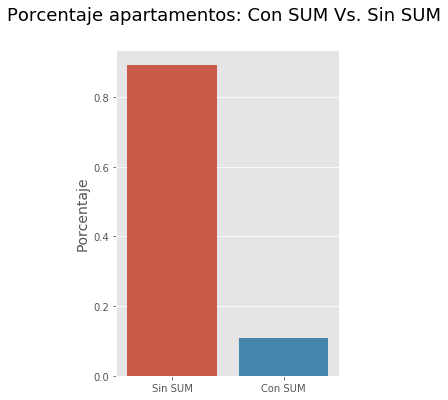

In [27]:
plt.figure(figsize=(4, 6))
ax = sns.barplot(x = ['Sin SUM', 'Con SUM'], y = usosmultiples_normalized)
plt.suptitle('Porcentaje apartamentos: Con SUM Vs. Sin SUM', fontsize=18)
plt.ylabel("Porcentaje", fontsize = 14)

Text(0, 0.5, 'Precio propiedad promedio')

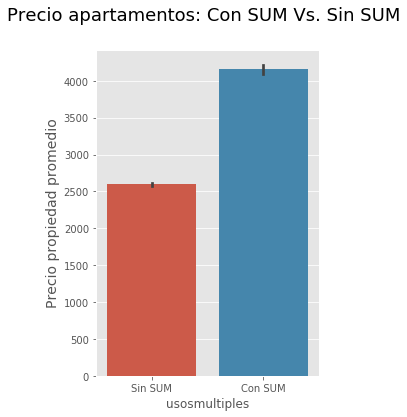

In [28]:
plt.figure(figsize=(4, 6))
ax = sns.barplot(x = propiedades_usosmultiples.usosmultiples, y = propiedades_usosmultiples.precio_en_miles)
plt.suptitle('Precio apartamentos: Con SUM Vs. Sin SUM', fontsize=18)
ax.set_xticklabels(['Sin SUM', 'Con SUM'])
plt.ylabel("Precio propiedad promedio", fontsize = 14)

In [29]:
propiedades_escuelas = pd.DataFrame()
propiedades_escuelas['escuelascercanas'] = data['escuelascercanas'].apply(lambda x: False if x=='NaN' else x)
propiedades_escuelas['tipodepropiedad'] = data['tipodepropiedad'].apply(definir_tipo)
propiedades_escuelas['precio_en_miles'] = data['precio']/1000
propiedades_escuelas['count'] = 1
propiedades_escuelas_normalized = propiedades_escuelas.escuelascercanas.value_counts(normalize = True)

Text(0, 0.5, 'Porcentaje')

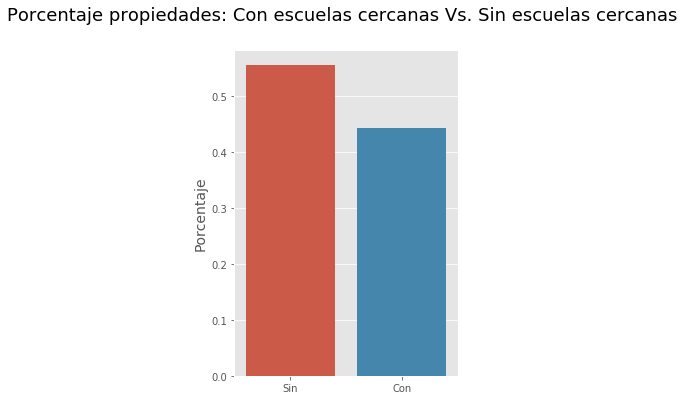

In [30]:
plt.figure(figsize=(4, 6))
ax = sns.barplot(x = ['Sin', 'Con'], y = propiedades_escuelas_normalized)
plt.suptitle('Porcentaje propiedades: Con escuelas cercanas Vs. Sin escuelas cercanas', fontsize=18)
plt.ylabel("Porcentaje", fontsize = 14)

Text(0.5, 1.0, 'Cercania a escuelas por tipo de propiedad')

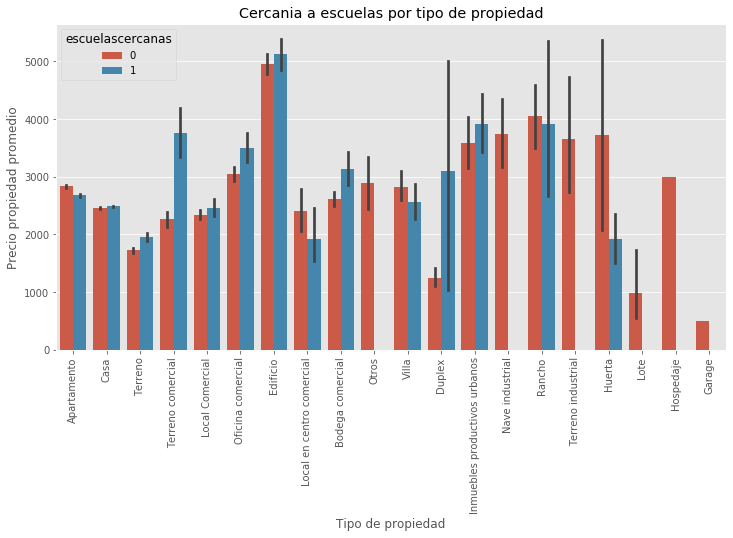

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='tipodepropiedad', y='precio_en_miles', hue='escuelascercanas', data=propiedades_escuelas)
plt.xticks(rotation=90)
plt.ylabel('Precio propiedad promedio')
plt.xlabel('Tipo de propiedad')
plt.title('Cercania a escuelas por tipo de propiedad')

In [32]:
propiedades_escuelas_count = propiedades_escuelas.groupby(['tipodepropiedad', 'escuelascercanas']).agg({'count':'sum'})
propiedades_escuelas_count.reset_index(inplace = True)
propiedades_escuelas_count['count'] = np.log(propiedades_escuelas_count['count'])

prop = ['Apartamento', 'Bodega comercial', 'Casa', 'Duplex', 'Edificio', 'Inmuebles productivos urbanos',
        'Local Comercial', 'Local en centro comercial', 'Oficina comercial', 'Rancho', 'Terreno', 'Terreno comercial', 'Villa']

df = propiedades_escuelas_count.loc[propiedades_escuelas_count.tipodepropiedad.isin(prop)]

Text(0.5, 1.0, 'Cercania a escuelas por tipo de propiedad')

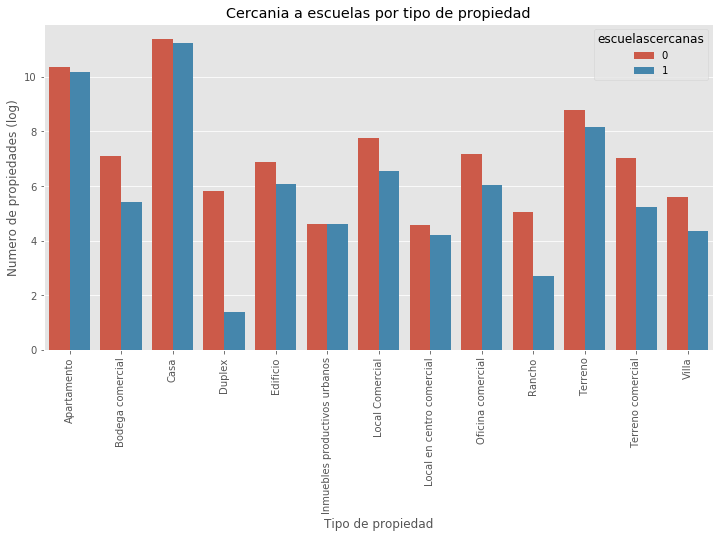

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x='tipodepropiedad', y='count', hue='escuelascercanas', data=df)
plt.xticks(rotation=90)
plt.ylabel('Numero de propiedades (log)')
plt.xlabel('Tipo de propiedad')
plt.title('Cercania a escuelas por tipo de propiedad')

In [34]:
propiedades_cc = pd.DataFrame()
propiedades_cc['centroscomercialescercanos'] = data['centroscomercialescercanos'].apply(lambda x: False if x=='NaN' else x)
propiedades_cc['tipodepropiedad'] = data['tipodepropiedad'].apply(definir_tipo)
propiedades_cc['precio_en_miles'] = data['precio']/1000
propiedades_cc['count'] = 1
propiedades_cc_normalized = propiedades_cc.centroscomercialescercanos.value_counts(normalize = True)

Text(0, 0.5, 'Porcentaje')

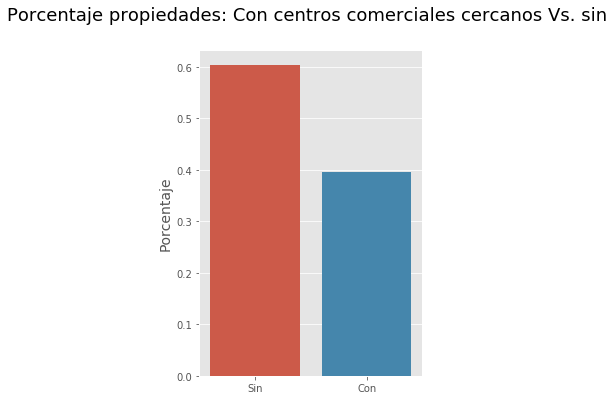

In [35]:
plt.figure(figsize=(4, 6))
ax = sns.barplot(x = ['Sin', 'Con'], y = propiedades_cc_normalized)
plt.suptitle('Porcentaje propiedades: Con centros comerciales cercanos Vs. sin', fontsize=18)
plt.ylabel("Porcentaje", fontsize = 14)

Text(0.5, 1.0, 'Cercania a centros comerciales por tipo de propiedad')

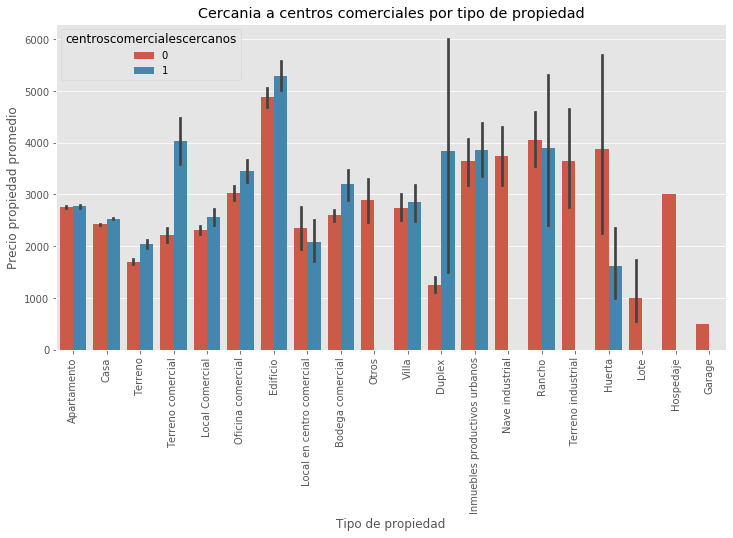

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x='tipodepropiedad', y='precio_en_miles', hue='centroscomercialescercanos', data=propiedades_cc)
plt.xticks(rotation=90)
plt.ylabel('Precio propiedad promedio')
plt.xlabel('Tipo de propiedad')
plt.title('Cercania a centros comerciales por tipo de propiedad')

Text(0.5, 1.0, 'Numero cercano a centros comerciales (log)')

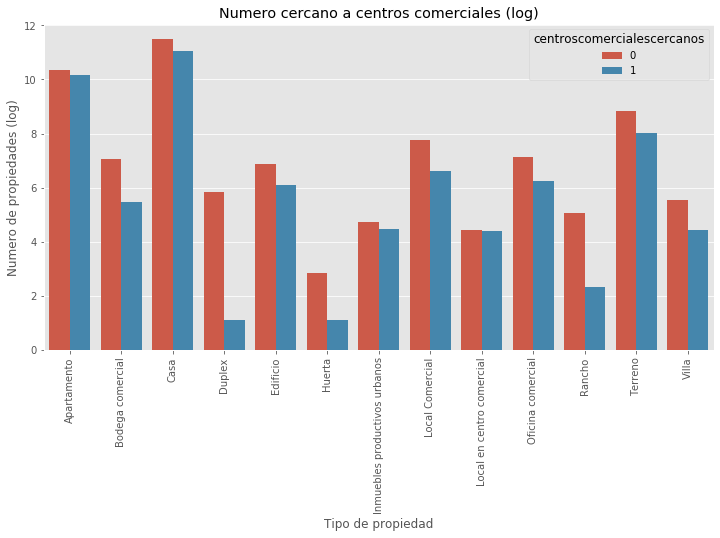

In [37]:
propiedades_cc_count = propiedades_cc.groupby(['tipodepropiedad', 'centroscomercialescercanos']).agg({'count':'sum'})
propiedades_cc_count.reset_index(inplace = True)
propiedades_cc_count['count'] = np.log(propiedades_cc_count['count'])

prop = ['Apartamento', 'Casa', 'Terreno', 'Terreno comerrcial', 'Local Comercial', 'Oficina comercial',
        'Edificio', 'Local en centro comercial', 'Bodega comercial', 'Villa', 'Duplex', 'Inmuebles productivos urbanos',
        'Rancho', 'Huerta']

df = propiedades_cc_count.loc[propiedades_cc_count.tipodepropiedad.isin(prop)]

plt.figure(figsize=(12, 6))
sns.barplot(x='tipodepropiedad', y='count', hue='centroscomercialescercanos', data=df)
plt.xticks(rotation=90)
plt.ylabel('Numero de propiedades (log)')
plt.xlabel('Tipo de propiedad')
plt.title('Numero cercano a centros comerciales (log)')